In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image
import numpy as np

In [4]:
path="C:/Users/Prueba/.cache/kagglehub/datasets/mahmoudshaheen1134/plant-leaf-image-dataset/versions/1/New_data/"
data_dir = path  # The path to your dataset folder

# Set up training and validation generators
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize the images
    validation_split=0.2  # Reserve 20% of data for validation
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),  # Resize images to 150x150 pixels
    batch_size=32,
    class_mode='categorical',  # Use categorical mode for more than two classes
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)



Found 2874 images belonging to 8 classes.
Found 714 images belonging to 8 classes.


In [5]:
model = tf.keras.models.Sequential([
    # First Convolutional Layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Second Convolutional Layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Third Convolutional Layer
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Flatten the image data
    tf.keras.layers.Flatten(),

    # Fully connected layer
    tf.keras.layers.Dense(512, activation='relu'),

    # Output layer
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()  # To see the summary of the model


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │         4,104 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,037,768 (72.62 MB)

 Trainable params: 19,037,768 (72.62 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:


history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,  # You can increase this if you want better results
    verbose=1
)


c:\Users\Prueba\Documents\PYTHON_SCRIPTS\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 42s 440ms/step - accuracy: 0.4032 - loss: 1.6367 - val_accuracy: 0.5616 - val_loss: 1.2966
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 38s 422ms/step - accuracy: 0.8446 - loss: 0.4929 - val_accuracy: 0.7115 - val_loss: 1.0191
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 38s 424ms/step - accuracy: 0.9690 - loss: 0.0990 - val_accuracy: 0.7591 - val_loss: 1.0711
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 453ms/step - accuracy: 0.9874 - loss: 0.0461 - val_accuracy: 0.7311 - val_loss: 1.2951
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 40s 444ms/step - accuracy: 0.9826 - loss: 0.0529 - val_accuracy: 0.7535 - val_loss: 1.4637
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 452ms/step - accuracy: 0.9870 - loss: 0.0331 - val_accuracy: 0.7269 - val_loss: 1.4883
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 40s 445ms/step - accuracy: 0.9909 - loss: 0.0297 - val_accuracy: 0.7465 - val_loss: 1.2918
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 456ms/step - accuracy: 0.9980 - loss: 0.0179 - val_accu

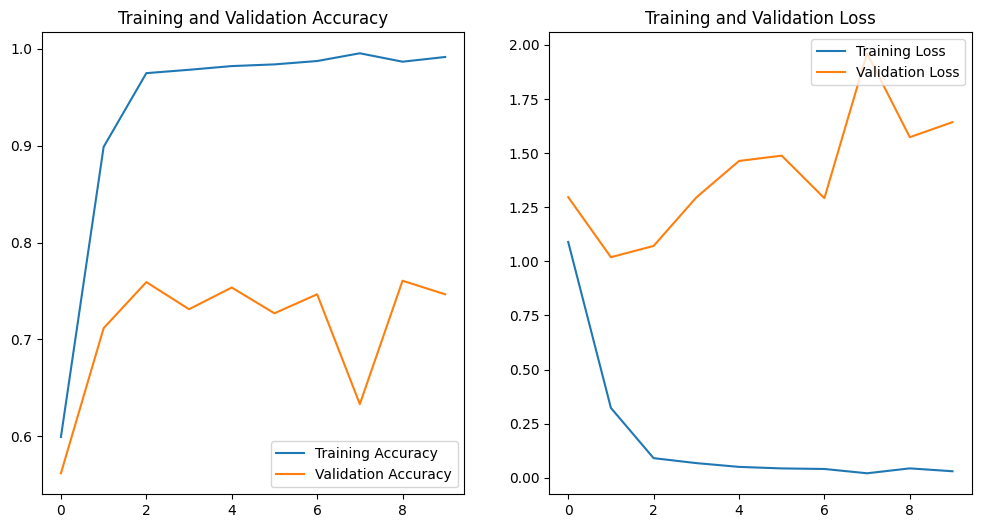

In [7]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)  # Adjust this to match the number of epochs

plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


In [8]:
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation accuracy: {val_accuracy:.2f}")


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.7570 - loss: 1.6139 
Validation accuracy: 0.75


In [11]:
# Guardar el modelon y usarlo después
# model.save('my_image_classifier.h5')
# model = tf.keras.models.load_model('my_image_classifier.h5')


In [9]:
class_indices = train_generator.class_indices

# Reverse the class_indices dictionary to map indices to class names
index_to_class = {v: k for k, v in class_indices.items()}
index_to_class

{0: 'Apple',
 1: 'Berry',
 2: 'Fig',
 3: 'Guava',
 4: 'Orange',
 5: 'Palm',
 6: 'Persimmon',
 7: 'Tomato'}

In [10]:
path_2="C:/Users/Prueba/.cache/kagglehub/datasets/mahmoudshaheen1134/plant-leaf-image-dataset/versions/1/New_data/Tomato/IMG_20240702_162052.jpg"

In [11]:

###USAR EL MODELO
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the trained model
model = tf.keras.models.load_model('my_image_classifier.h5')

# Load and preprocess a new image
img_path = path_2  # Replace with the path to your image
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the image if necessary

# Make the prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Map the predicted class index to the class name
# class_names = ['category1', 'category2', 'category3']  # Replace with your class names
# print(f"Predicted class: {class_names[predicted_class[0]]}")


c:\Users\Prueba\Documents\PYTHON_SCRIPTS\myenv\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


In [12]:
print(index_to_class[predicted_class[0]])

Tomato


{0: 'Apple',
 1: 'Berry',
 2: 'Fig',
 3: 'Guava',
 4: 'Orange',
 5: 'Palm',
 6: 'Persimmon',
 7: 'Tomato'}